# 關於跳脫字元符號
+ 由於正規表示式使用\符號針對特殊字元進行轉換，例如若想要查詢這個字串 'pcschool.com'，我們使用的正規表示式方式為 'pcschool\.com'。
+ Python 的字串也是使用\符號進行特殊字元轉換，上述的正規表示式於Python 內可寫成 'pcschool\\.com' ，如此寫法會有很多 \ 符號出現的困擾。
+ 建議可於字串前面加上 r 的前導符號就可以，所以上面的範例可改為：
 'r'python\.com' 

## findall 方法
+ findall(搜尋字串,起始位置,結束位置)
  + 找到所有符合正則表達式的內容
  + 起始位置與結束位置是可選擇的參數，預設值分別為 0 與字串長度。
  + findall 將以 list 方式傳回所有可以比對的資料，若找不到可以比對的資料則會傳回一個空的 list。

## 設定跳脫與首尾
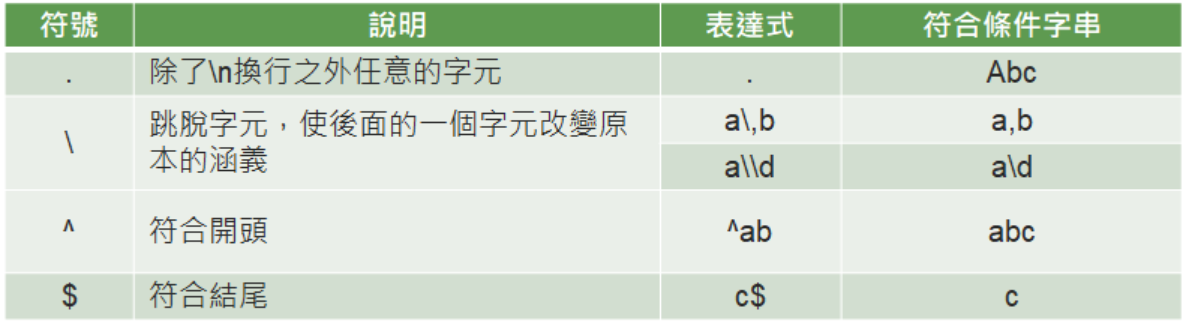
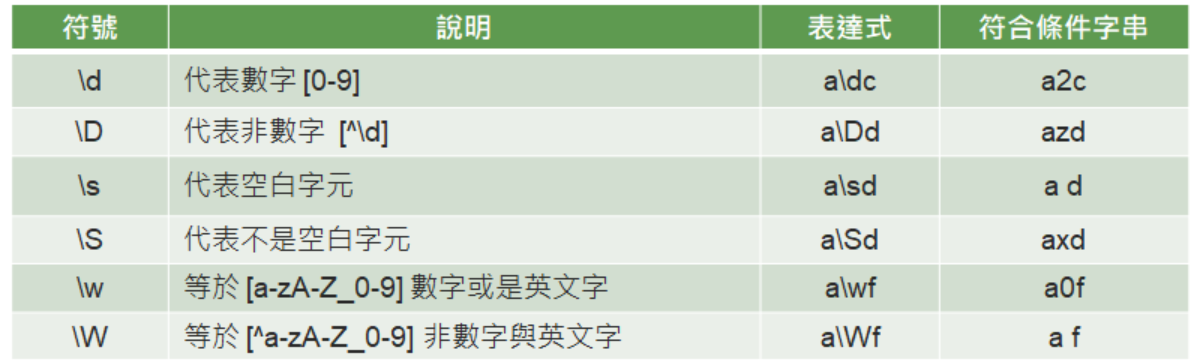

In [1]:
import re
s = "Tim's phone numbers are 12345-41521 and 78963-85214"
match = re.findall(r'\d', s)
if match:
    print(match)

['1', '2', '3', '4', '5', '4', '1', '5', '2', '1', '7', '8', '9', '6', '3', '8', '5', '2', '1', '4']


## 計算字元數
+ 定義字元數
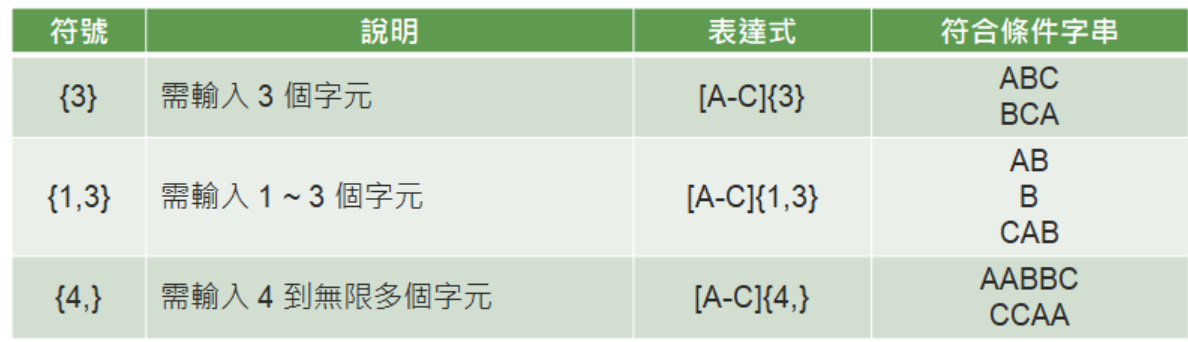

In [2]:
import re
s = "Tim's phone numbers are 12345-41521 and 78963-85214"
match = re.findall(r'\d{5}', s)
if match:
    print(match)


['12345', '41521', '78963', '85214']


## 依據尋找的字元範圍
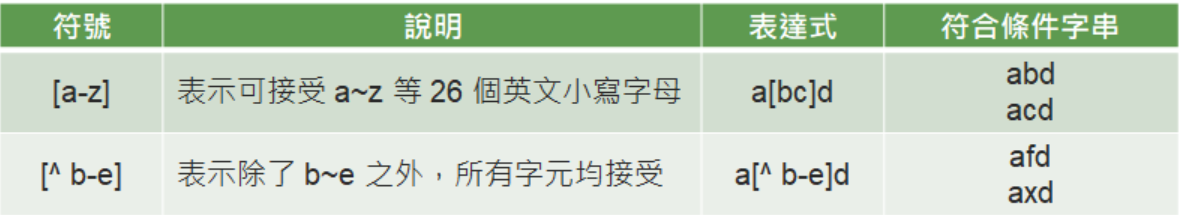

In [6]:
import re
ptn = r"r[au]n " #空格是否會影響? 找到"ran "" r到n中間可以是a或u其中一個 再接一個空白
#ptn = r"r[au]n" # 找到 ran與run r到n中間可以是a或u其中一個
#ptn = r"r[a-u]n" #['ran', 'run', 'rin']r到n中間可以是a b c d e f g h i j h l m n o p q r s t u 之間的任意一個
#ptn = r"r[a-u]{1,3}n" #['ran', 'run', 'rain', 'rin']r到n中間可以是a b c d e f g h i j h l m n o p q r s t u數量為1或3各
print(re.findall(ptn, "dog ran  runs to cat rain rin"))

['ran', 'run', 'rain', 'rin']


In [7]:
import re
string1="1dog  cat2  3rabbit "
print(re.findall(r"[A-Z]",string1))
print(re.findall(r"[a-c]",string1))
print(re.findall(r"[0-9]",string1))
print(re.findall(r"[^a-c]",string1)) #除了a~c之外的

[]
['c', 'a', 'a', 'b', 'b']
['1', '2', '3']
['1', 'd', 'o', 'g', ' ', ' ', 't', '2', ' ', ' ', '3', 'r', 'i', 't', ' ']


## 計算重複數量
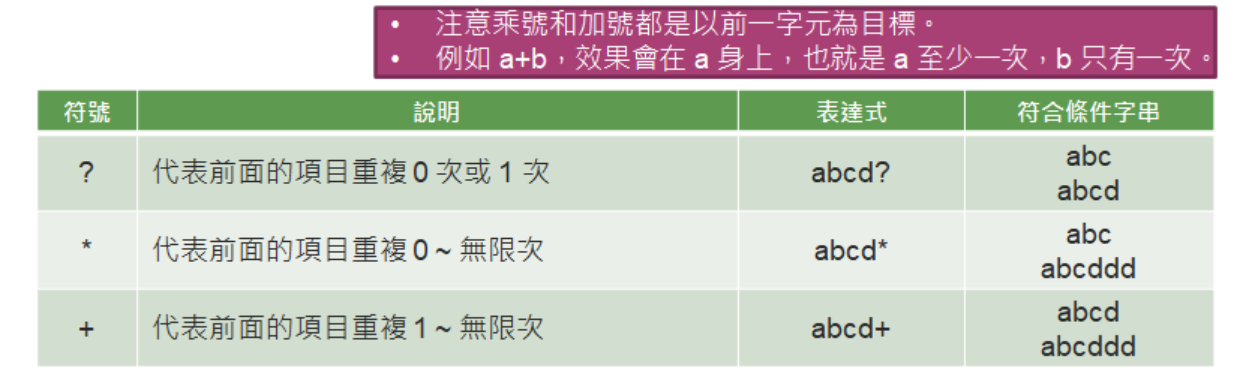

In [8]:
import re
pattern = re.compile(r'\d+')  
result1 = pattern.findall('hello 123456 789')
result2 = pattern.findall('one1two2three3four4', 0, 13)
print(result1  )#['123456', '789']
print(result2  )#['1', '2'] 0~不包含13的區間搜尋數字

['123456', '789']
['1', '2']


In [9]:
import re
str1="abc1d abcdd abc2b abc aaaa"
print(re.findall(r"abcd?", str1))
print(re.findall(r"abcd*",str1))
print(re.findall(r"abc\d+",str1))
print(re.findall(r"[a-c]{3}", str1))#abc任意字母組合必須出現3次
print(re.findall(r"[a-c]{1,4}", str1))#abc任意字母組合必須出現1~4次
print(re.findall(r"[a-c]{4,}",str1))#abc任意字母組合最少4次最多無限

['abc', 'abcd', 'abc', 'abc']
['abc', 'abcdd', 'abc', 'abc']
['abc1', 'abc2']
['abc', 'abc', 'abc', 'abc', 'aaa']
['abc', 'abc', 'abc', 'b', 'abc', 'aaaa']
['aaaa']


In [10]:
import re
string1="C++ Python Java C# Sqlite Django Numpy Pandas "
print(re.findall(r"[p-t]",string1))#p q r s t 

['t', 'q', 't', 'p', 's']


## split 方法
+ split 方法能以比對規則針對字串進行切割後產生 list。
+ split 它的使用形式如下：
+ split(字串,最大分割次數)
   + 若不指定最大分割次數則全部分割

In [13]:
import re
text = 'one, two...ten'
re1=re.split('[,. ]+', text)#碰到,或.或 空白 1次或多次都需要分割
print(re1)
re1=re.split('[,. ]+', text, maxsplit=1)
print(re1)

['one', 'two', 'ten']
['one', 'two...ten']


## sub 方法
+ sub 方法用於替換，它的使用形式如下
  + sub(取代的字串或函數,來源字串,可設定被取代的數量)
+ 可設定被取代的數量若不指定時全部替換。


In [14]:
import re
inputStr = "hello 123 world 456"
replacedStr = re.sub('\d+',"222",inputStr)
print(replacedStr)
replacedStr = re.sub("\d+", "222 ", inputStr,count=1) 
print(replacedStr)

hello 222 world 222
hello 222  world 456


In [15]:
import re
inputStr = "1970,C language,1990,python"
replacedStr = re.sub("\d+", "2018", inputStr)
print(replacedStr)

2018,C language,2018,python


# 切割與合併

## row 的切割與合併
+ row 代表第一維，代表 axis=0，也可說水平的一列一列。
+ 可使用 vsplit 方式進行切割，可指定要切割的數量。
   + 回傳一組list內包含 ndArray
+ 可使用 vstack 方式進行合併。

## column 的切割與合併
+ column 代表第二維，代表 axis=1，也可說垂直的一行一行。
+ 可使用 hsplit 方式進行切割，可指定要切割的數量。
+ 可使用 hstack 方式進行合併。

In [16]:
import numpy as np
a = np.arange(12).reshape(3, 4)
print(a)
print("---------------")
print(np.vsplit(a,3))
print("---------------")
print(np.vsplit(a,3)[1])
print("---------------")
print(type(np.vsplit(a,3)))
print("---------------")
b=np.arange(12,24).reshape(3, 4)
print(b)
print("---------------")
c=np.vstack((a,b))
print(c)
print("---------------")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
---------------
[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
---------------
[[4 5 6 7]]
---------------
<class 'list'>
---------------
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
---------------
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
---------------


In [19]:
import numpy as np
a = np.arange(12).reshape(3, 4)
print(a)
print("---------------")
print(np.hsplit(a,4))
print("---------------")
print(np.hsplit(a,2))
b=np.arange(12,24).reshape(3, 4)
print(b)
print("---------------")
c=np.hstack((a,b))
print(c)
print("---------------")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
---------------
[array([[0],
       [4],
       [8]]), array([[1],
       [5],
       [9]]), array([[ 2],
       [ 6],
       [10]]), array([[ 3],
       [ 7],
       [11]])]
---------------
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11]])]
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
---------------
[[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]]
---------------


## 可選擇行列分合
+ split 代表切割的動作：
  + 若 axis 為 0 代表 row 切割，等同於 vsplit。
  + 若 axis 為 1 代表 column 切割，等同於 hsplit。
  + np.split(a,3,axis=0) #3 代表切割數。
+ concatenate 代表進行合併：
  + 若 axis 為 0 代表 row 合併，等同於 vstack。
  + 若 axis 為 1 代表 column 合併，等同於 hstack。

In [20]:
import numpy as np
a = np.arange(12).reshape(3, 4)
print(a)
print("---------------")
print(np.split(a,3,axis=0))
print("---------------")
print(np.split(a,2,axis=1))
print("---------------")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
---------------
[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
---------------
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11]])]
---------------


In [21]:
import numpy as np
a = np.arange(12).reshape(3, 4)
b = np.arange(12,24).reshape(3, 4)
c = np.concatenate((a,b),axis=0)
print(c)
print("---------------")
c=np.concatenate((a,b),axis=1)
print(c)
print("---------------")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
---------------
[[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]]
---------------


## 不等量切割
+ 利用 array_split 方法進行不等量的切割。

In [26]:
import numpy as np
a = np.arange(12).reshape(3,4)
print(a)
print(np.array_split(a,2,axis=0))

print("-------------------")
print(np.array_split(a,3,axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[array([[0, 1, 2, 3],
       [4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]
-------------------
[array([[0, 1],
       [4, 5],
       [8, 9]]), array([[ 2],
       [ 6],
       [10]]), array([[ 3],
       [ 7],
       [11]])]


## 檔案讀取查詢 作業

In [27]:
import csv
inValue = input("請輸入郵遞區號:")
with open("HW16__Data.csv",'r',encoding="utf-8") as data:
    csvList = csv.reader(data)
    for data in csvList :
        if data[2] == inValue:
           print(data)

請輸入郵遞區號:104
['中山分局', 'Zhongshan Precinct', '104', '臺北市中山區中山北路2段1號', '02 25412491', '302750.6974', '2771704.464']
['中山一派出所', 'Zhongshan First Police Station', '104', '臺北市中山區中山北路1段110號', '02 25519321', '302613.5457', '2771415.78']
['中山二派出所', 'Zhongshan Second Police Station', '104', '臺北市中山區中山北路2段90號', '02 25517771', '302727.2356', '2772263.722']
['圓山派出所', 'Yuanshan Police Staticn', '104', '臺北市中山區中山北路3段62號', '02 25969433', '302834.9838', '2773933.985']
['長春路派出所', 'Changchun Rd. Police Station', '104', '臺北市中山區長春路206號', '02 25062289', '304083.3089', '2771936.628']
['長安東路派出所', 'Changan E. Rd. Police Station', '104', '臺北市中山區長安東路2段165號', '02 27735207', '304542.2421', '2771254.798']
['民權一派出所', 'Minquan First Police Station', '104', '臺北市中山區新生北路2段127之1號', '02 25314672', '303266.0302', '2772517.502']
['建國路派出所', 'Jianguo Police Station', '104', '臺北市中山區民族東路284號', '02 25099774', '304074.2363', '2773416.496']
['大直派出所', 'Dazhi Police Station', '104', '臺北市中山區北安路456號', '02 25332984', '304885.9044', '2774

# 遺失與重複值處理

## 判斷遺失值產生原因
+ 有些資訊是暫時無法讀取。
+ 有些資訊是被遺漏。
+ 有些對象的某些屬性特徵是不存在。
+ 有些資訊被認為不重要。
+ 操作這些資訊的代價太大而被遺棄。

## 遺失值處理
+ 使用 reindexing，我們創建了一個缺失值的 DataFrame。在輸出中，NaN 表示不是數字。
檢查缺失值
+ 為了更容易地檢測缺失值以及避免受到資料類型干擾，Pandas 提供了 isnull( ) 和 notnull( ) 函數。

In [28]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
1.0,2.0,3.5,4
5.5,34,3.4
10,,11.5,8.5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)

      A     B     C    D
0   1.0   2.0   3.5  4.0
1   5.5  34.0   3.4  NaN
2  10.0   NaN  11.5  8.5


## 忽略遺失值
+ 忽略丟棄
  + 如果你直接把具有遺漏值的資料丟掉，那麼很可能你的訓練資料量或是維度會下降。
  + 你在未來預測資料時，也可能會遇到資料不全的狀況。
+ 缺少資料的計算
  + 計算數值資料總和時 NA 將被視為零。
  + 如果數值資料全部是 NA，那麼結果將是 NA。

In [29]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,4,5
6,34,6
10,,11,8
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print(df[['A']].sum())
print(df[['B']].sum())
print(df[['A']].mean())
print(df[['B']].mean())# 數量算2筆
print(df[['A']].count())
print(df[['B']].count())
print(df.isnull().sum())

    A     B   C    D
0   2   3.0   4  5.0
1   6  34.0   6  NaN
2  10   NaN  11  8.0
A    18
dtype: int64
B    37.0
dtype: float64
A    6.0
dtype: float64
B    18.5
dtype: float64
A    3
dtype: int64
B    2
dtype: int64
A    0
B    1
C    0
D    1
dtype: int64


## 丟棄遺失值
+ 您可以使用 dropna 方法再搭配 axis 參數方式進行搭配。
+ 默認情況下，預設為 axis = 0，也就是會沿著 Rows 進行，當發現到任何值為 NA 就會整個 Row 刪除。
+ 若加入參數 how=‘all’ 代表整個 Row 資料都是遺失值情況下才可以刪除丟棄。
+ 加入參數 thresh=N 代表刪除包含少於 N 個觀察值的 row。

In [30]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,4,5
6,34,6
10,,11,8
,,,
3,3,,
,5,,
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("============")
df1=df.dropna(axis=0)#只要一個Row是Nan就移除
print(df1)
print("============")
df2=df.dropna(axis=1) #因為每一欄都有NaN所以沒資料
print(df2)
print("============")
df3=df.dropna(axis=0,how='all')# 所有都是Nan才移除
print(df3)
print("============")
print(df3.reset_index(drop=True))

      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  NaN
2  10.0   NaN  11.0  8.0
3   NaN   NaN   NaN  NaN
4   3.0   3.0   NaN  NaN
5   NaN   5.0   NaN  NaN
     A    B    C    D
0  2.0  3.0  4.0  5.0
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5]
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  NaN
2  10.0   NaN  11.0  8.0
4   3.0   3.0   NaN  NaN
5   NaN   5.0   NaN  NaN
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  NaN
2  10.0   NaN  11.0  8.0
3   3.0   3.0   NaN  NaN
4   NaN   5.0   NaN  NaN


In [31]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D,E
2,3,4,5,
6,34,6,
10,,11,8,
,,,
3,,3,,
,5,,,
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("============")
df1=df.dropna(thresh=3) # 每一各row有3各NaN的移除
print(df1)
print("============")
df2=df.dropna(subset=['C','D']) # c跟d欄位都不是NaN的顯示
print(df2)

      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
3   NaN   NaN   NaN  NaN NaN
4   3.0   NaN   3.0  NaN NaN
5   NaN   5.0   NaN  NaN NaN
      A     B     C    D   E
0   2.0   3.0   4.0  5.0 NaN
1   6.0  34.0   6.0  NaN NaN
2  10.0   NaN  11.0  8.0 NaN
      A    B     C    D   E
0   2.0  3.0   4.0  5.0 NaN
2  10.0  NaN  11.0  8.0 NaN


## 填充遺失值
+ 可使用 fillna 函數進行填充
  + 輸入要填充的數值
    + 補上中位數：建議補上中位數而非平均值，這樣相對來說不會受到極端值的影響。
    + 根據原本的資料分布補上亂數。
+ 以下兩種方式可以向後或者向前進行填充
   + pad/ffill          代表向後填充
   + bfill/backfill   代表向前填充

In [32]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,4,5
6,34,6
10,,11,8
,,,
3,3,,
,5,,
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("============")
df1=df.fillna(0)
print(df1)
print("============")
median1=df.median()#中位數
print(median1)
print("============")
df2=df.fillna(median1)
print(df2)

      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  NaN
2  10.0   NaN  11.0  8.0
3   NaN   NaN   NaN  NaN
4   3.0   3.0   NaN  NaN
5   NaN   5.0   NaN  NaN
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  0.0
2  10.0   0.0  11.0  8.0
3   0.0   0.0   0.0  0.0
4   3.0   3.0   0.0  0.0
5   0.0   5.0   0.0  0.0
A    4.5
B    4.0
C    6.0
D    6.5
dtype: float64
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  6.5
2  10.0   4.0  11.0  8.0
3   4.5   4.0   6.0  6.5
4   3.0   3.0   6.0  6.5
5   4.5   5.0   6.0  6.5


In [33]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,4,5
6,34,6
10,,11,8
,,,
3,3,,
,5,,
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("========================")
df1=df.fillna(0,limit=1) #限制每一欄只補一個數
print(df1)
print("========================")
median1=df.median()
print(median1)
print("========================")
df2=df.fillna(median1,limit=1)
print(df2)

      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  NaN
2  10.0   NaN  11.0  8.0
3   NaN   NaN   NaN  NaN
4   3.0   3.0   NaN  NaN
5   NaN   5.0   NaN  NaN
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  0.0
2  10.0   0.0  11.0  8.0
3   0.0   NaN   0.0  NaN
4   3.0   3.0   NaN  NaN
5   NaN   5.0   NaN  NaN
A    4.5
B    4.0
C    6.0
D    6.5
dtype: float64
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  6.5
2  10.0   4.0  11.0  8.0
3   4.5   NaN   6.0  NaN
4   3.0   3.0   NaN  NaN
5   NaN   5.0   NaN  NaN


### 以下兩種方式可以向後或者向前進行填充
   + pad/ffill          代表向後填充
   + bfill/backfill   代表向前填充

In [35]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,4,5
6,34,6
10,,11,8
,,,
3,,,
,5,,
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("=============")
df1=df.fillna(method='pad') # 如果當前欄位是NaN  向上一筆同欄直到非NaN的值 寫入目前欄位
print(df1)
print("=============")
df2=df.fillna(method='backfill') # 如果當前欄位是NaN  向下一筆同欄直到非NaN的值 寫入目前欄位
print(df2)
print("======pad limit=1=======")
df1=df.fillna(method='pad',limit=1) #因為limit為1 當前欄位是NaN 向上找1筆 寫入目前欄位
print(df1)
print("======backfill limit=1=======")
df2=df.fillna(method='backfill',limit=1)# 因為limit為1 當前欄位是NaN 向下找1筆 寫入目前欄位
print(df2)
print("=============")

      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  NaN
2  10.0   NaN  11.0  8.0
3   NaN   NaN   NaN  NaN
4   3.0   NaN   NaN  NaN
5   NaN   5.0   NaN  NaN
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  5.0
2  10.0  34.0  11.0  8.0
3  10.0  34.0  11.0  8.0
4   3.0  34.0  11.0  8.0
5   3.0   5.0  11.0  8.0
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  8.0
2  10.0   5.0  11.0  8.0
3   3.0   5.0   NaN  NaN
4   3.0   5.0   NaN  NaN
5   NaN   5.0   NaN  NaN
======pad limit=1=======
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  5.0
2  10.0  34.0  11.0  8.0
3  10.0   NaN  11.0  8.0
4   3.0   NaN   NaN  NaN
5   3.0   5.0   NaN  NaN
======backfill limit=1=======
      A     B     C    D
0   2.0   3.0   4.0  5.0
1   6.0  34.0   6.0  8.0
2  10.0   NaN  11.0  8.0
3   3.0   NaN   NaN  NaN
4   3.0   5.0   NaN  NaN
5   NaN   5.0   NaN  NaN


## 重複值偵測
+ 可利用 duplicated( ) 方法檢查 dataframe 內的 row 是否有完整重複值資料。
+ 若 duplicated( ) 方法內加入欄位名稱代表檢查某欄位是否有重複資料。
+ drop_duplicates( ) 方法將會丟棄重複值：
  + 預設保留第一個。
  + 若加入 keep=‘first’ 將得到相同結果。
  + 若加入 keep=‘last’ 將保留最後一個。
  + 若加入 keep=False 代表不保留。
+ 站在 row 的角度，若有多個重複的資料，那 row 也會執行多個重複值的檢查與刪除。
+ 站在 column 角度，若要進行重複值的檢查與刪除，必須告訴他column 名稱，若是兩個欄位以上，請加入 subset=[‘欄位1’,‘欄位2’]。

In [36]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5


### 檢查重複

In [37]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("------0----")
print(df.duplicated()) #因為index 2的row 5 5 5 與 index 1的row 5 5 5 一模一樣所以重複
print("-------1---------")
print(df.duplicated('A')) # 單獨查A欄的數值是否重複
print("-------2---------")
print(df.duplicated('D'))
print("-------3---------")

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
------0----
0    False
1    False
2     True
3    False
dtype: bool
-------1---------
0    False
1    False
2     True
3    False
dtype: bool
-------2---------
0    False
1     True
2     True
3     True
dtype: bool
-------3---------


### 丟棄重複值的資料

In [38]:
import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("==================")
print(df.drop_duplicates())#保留第一個重複的
print("==================")
print(df.drop_duplicates(keep='last')) #保留最後一個重複的
print("==================")
print(df.drop_duplicates(keep=False)) #不保留
print("==================")

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
1   5   5  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
2   5   5  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
3  13  23  5  5


In [39]:
# import pandas as pd
import  numpy as np
from io import  StringIO
csv_data='''
A,B,C,D
2,3,5,5
5,5,5,5
5,5,5,5
13,23,5,5
'''
df=pd.read_csv(StringIO(csv_data))
print(df)
print("======")
print(df.drop_duplicates(subset=['C','D'])) #因為C D 重頭到尾都重複 所以 只留index :0的資料
print("======")
print(df.drop_duplicates(subset=['C','D'],keep='last'))#因為C D 重頭到尾都重複 keep 為 last 所以 只留index :3
print("======")
print(df.drop_duplicates(subset=['C','D'],keep=False))#因為C D 重頭到尾都重複 keep 為 False都不留 所以空
print("======")
print(df.drop_duplicates(subset=['A','D'],keep=False))
print("======")
print(df.drop_duplicates(subset=['B']))

    A   B  C  D
0   2   3  5  5
1   5   5  5  5
2   5   5  5  5
3  13  23  5  5
   A  B  C  D
0  2  3  5  5
    A   B  C  D
3  13  23  5  5
Empty DataFrame
Columns: [A, B, C, D]
Index: []
    A   B  C  D
0   2   3  5  5
3  13  23  5  5
    A   B  C  D
0   2   3  5  5
1   5   5  5  5
3  13  23  5  5


In [40]:
import pandas as pd
data = pd.read_csv('HW17__Data.csv')
for v in data.columns:
    if v != '行業別':
        print(f'{v}平均值為:{data[v].mean():.2f}')
    else:
        print(f'行業筆數:{data[v].count():.0f}')

行業筆數:111
經常性薪資平均值為:27764.80
專業人員-經常性薪資平均值為:33162.01
技術員及助理專業人員-經常性薪資平均值為:28917.55
事務支援人員-經常性薪資平均值為:26588.43
服務及銷售工作人員-經常性薪資平均值為:22083.83
技藝_機械設備操作及組裝人員-經常性薪資平均值為:23405.24
基層技術工及勞力工-經常性薪資平均值為:19570.29


# 資料新增刪除轉換與取代
+ 資料轉換處理包含
  + 資料取代
  + 資料分析後轉換
+ 資料取代
  + 可使用 replace 方式來替換指定的值
+ Column 的索引值名稱變更
  + df=df.rename(columns={'原來名稱':'新的名稱'})  


## 資料分析轉換
+ Series 的 map 方法可以接受一個函數或含有 map 關係的字典型資訊。
+ 使用 map 是一種實現元素轉換以及其他資訊清理工作的方式。 
+ 可以搭配 Series 或 dict、匿名函數與一般函數作業。

In [41]:
import pandas as pd
s1 = pd.Series(range(10))
s2=s1.map(lambda x:x+10)
s3=s1.map(lambda x:x*-1)
print(s1)
print("--------------")
print(s2)
print("--------------")
print(s3)
print("--------------")

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64
--------------
0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64
--------------
0    0
1   -1
2   -2
3   -3
4   -4
5   -5
6   -6
7   -7
8   -8
9   -9
dtype: int64
--------------


In [42]:
import pandas as pd
x = pd.Series([1,2,3], index=['one', 'two', 'three'])
y = pd.Series(['foo', 'bar', 'baz'], index=[1,2,3])#可以把index當作key
x1=x.map(y) #y的index對上 x的value 決定要換置的數值 在x內 value是1 index:one 在y內value是foo index是1
# y的index跟 x的value對上了 把x的value換成y的value 
z = {1: 'A', 2: 'B', 3: 'C'}
x2=x.map(z) # dict內容 key為1 對上 x的value為1的正好取代 x　的value變為A
print(x)
print("--------------")
print(y)
print("--------------")
print(x1)
print("--------------")
print(x2)
print("--------------")
print(z)
print("--------------")

one      1
two      2
three    3
dtype: int64
--------------
1    foo
2    bar
3    baz
dtype: object
--------------
one      foo
two      bar
three    baz
dtype: object
--------------
one      A
two      B
three    C
dtype: object
--------------
{1: 'A', 2: 'B', 3: 'C'}
--------------


In [46]:
import pandas as pd
data = pd.DataFrame({'food':['bacon','pulled pork','bacon','Pastrami',
            'Corned beef','Bacon','pastrami','honey ham','nova lox'],
                  'ounces':[4,3,12,6,7.5,8,3,5,6]})
print(data)
print("=========================")
print(type(data['food']))
print("=========================")
meat_to_animal = {
    'bacon':'pig', 'pulled pork':'pig',
    'pastrami':'cow','corned beef':'cow',
    'honey ham':'pig', 'nova lox':'salmon' }
data['animal'] = data['food'].map(str.lower).map(meat_to_animal) # 建立一組新的animal欄位 將修改後的數值寫入
# 假設有一組需求 須建立food 對映 animal的關係
print("=========================")
print(data)


          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  Corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0
<class 'pandas.core.series.Series'>
          food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  Corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon


In [47]:
import pandas as pd
indexdate = pd.date_range('2018-09-25', periods=10)
print("--------------")
s1 = pd.Series(list(range(10)), index=indexdate)
s2=s1.index.map(lambda x: x.day) # 改變index為day
s3=s1.index.map(lambda x: x.weekday) # 改變index為星期幾 0是周一
s4=s1.map(lambda x: x+10) # 把value + 10
def f(x):
    if x < 5:
        return True
    else:
        return False
s5=s1.map(f)
s6 = pd.Series(list(range(10)), index=indexdate)
print(s1)
print("--------------")
print(s2)
print("--------------")
print(s3)
print("--------------")
print(s4)
print("--------------")
print(s5)
print("--------------")
print(s6)
print("--------------")
s6.index = s2 #將index換成day
print(s6)
print("--------------")

--------------
2018-09-25    0
2018-09-26    1
2018-09-27    2
2018-09-28    3
2018-09-29    4
2018-09-30    5
2018-10-01    6
2018-10-02    7
2018-10-03    8
2018-10-04    9
Freq: D, dtype: int64
--------------
Int64Index([25, 26, 27, 28, 29, 30, 1, 2, 3, 4], dtype='int64')
--------------
Int64Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3], dtype='int64')
--------------
2018-09-25    10
2018-09-26    11
2018-09-27    12
2018-09-28    13
2018-09-29    14
2018-09-30    15
2018-10-01    16
2018-10-02    17
2018-10-03    18
2018-10-04    19
Freq: D, dtype: int64
--------------
2018-09-25     True
2018-09-26     True
2018-09-27     True
2018-09-28     True
2018-09-29     True
2018-09-30    False
2018-10-01    False
2018-10-02    False
2018-10-03    False
2018-10-04    False
Freq: D, dtype: bool
--------------
2018-09-25    0
2018-09-26    1
2018-09-27    2
2018-09-28    3
2018-09-29    4
2018-09-30    5
2018-10-01    6
2018-10-02    7
2018-10-03    8
2018-10-04    9
Freq: D, dtype: int64
-----------

## Apply

In [49]:
import pandas as pd

data = pd.DataFrame({'food':['bacon','pulled pork','bacon','Pastrami',
            'Corned beef','Bacon','pastrami','honey ham','nova lox'],
                  'ounces':[4,3,12,6,7.5,8,3,5,6]})
print(data)
print("=========================")
data['food-ounces']=data.apply(lambda dataf:f"{dataf['food']}-{dataf['ounces']}",axis=1 )
print("=========================")
print(data)

          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  Corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0
          food  ounces      food-ounces
0        bacon     4.0        bacon-4.0
1  pulled pork     3.0  pulled pork-3.0
2        bacon    12.0       bacon-12.0
3     Pastrami     6.0     Pastrami-6.0
4  Corned beef     7.5  Corned beef-7.5
5        Bacon     8.0        Bacon-8.0
6     pastrami     3.0     pastrami-3.0
7    honey ham     5.0    honey ham-5.0
8     nova lox     6.0     nova lox-6.0


# 分組
+ 可針對資料進行分組，然後對每組資料進行統計分析。
+ 分組運算過程：split → apply → combine
  + 拆解 split：依據規則進行拆解分組。
  + 應用 apply：每個分組運行計算規則處理。
  + 合併 combine：把每個分組的計算結果合併起來。
+ 可針對資料進行分組，然後對每組資料進行統計分析。
+ 分組運算過程：split → apply → combine
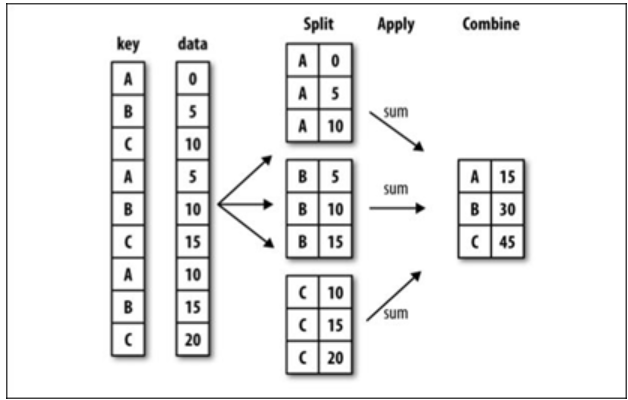
+ 可使用 groupby( ) 進行分組，而這動作並沒有進行實際運算，只是包含分組的資訊。
+ 物體可有多種切割方式：
  + df1.groupby('key')
  + df1.groupby(['key1','key2'])
  + df1.groupby(key,axis=1)

In [50]:
import pandas as pd
import numpy as np
a = {'key1' : ['a', 'b', 'a', 'b', 'a', 'b', 'a', 'a'],
     'key2' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
     'data1': [2,3,4,5,6,7,8,1],
     'data2':[8,1,2,3,5,6,7,6]}
df1 = pd.DataFrame(a)
print(df1)
print("-------------------")

  key1   key2  data1  data2
0    a    one      2      8
1    b    one      3      1
2    a    two      4      2
3    b  three      5      3
4    a    two      6      5
5    b    two      7      6
6    a    one      8      7
7    a  three      1      6
-------------------


### 開始群組

## 分組後的資料
+ 可針對分組後的資料進行分組計算，例如 mean( )。
+ 分組後將會傳回一組 tuple 資料，包含 group_name 與group_data，就可以做後續的運用。
+ get_group( ) 可得到指定的該組資訊。

In [53]:
import pandas025
df2=pandas025.df1
grouped2 = df2.groupby(['key1', 'key2'])
print("================")
print(grouped2.size( ))
print("================")
grouped3 =df2.groupby(['key2', 'key1']) #先用key2 群組 再用key1群組
print(grouped3.mean( )) #求出群組後的均值
print("================")
print(grouped3.mean( ).unstack()) #row 索引轉到colum
print("================")

key1  key2 
a     one      2
      three    1
      two      2
b     one      1
      three    1
      two      1
dtype: int64
            data1  data2
key2  key1              
one   a       5.0    7.5
      b       3.0    1.0
three a       1.0    6.0
      b       5.0    3.0
two   a       5.0    3.5
      b       7.0    6.0
      data1      data2     
key1      a    b     a    b
key2                       
one     5.0  3.0   7.5  1.0
three   1.0  5.0   6.0  3.0
two     5.0  7.0   3.5  6.0


## pandas025a的內容

In [54]:
import pandas025
df2=pandas025.df1
print("==========df2=================")
print(df2)
self_def_key = [0, 1, 2, 3, 3, 4, 5, 7]
print("===========================")
print(df2.groupby(self_def_key).size()) #群組自訂的Kye
print("=========key1==================")
print(df2['key1'])
print("==========key2=================")
print(df2['key2'])
print("==========groupby key2 key1=================")
print(df2.groupby([df2['key2'],df2['key1']]).size())
#print(df2.groupby(['key2','key1']).size())print("===========================")
print("============groupby('key1')mean===============")
grouped1 = df2.groupby('key1')
print(grouped1.mean()) #整組Dataframe 都群組key1 求平均值
print("===========================")
grouped2 = df2['data1'].groupby(df2['key1']) #針對data1 groupby key1
print(grouped2.mean())
print("===========================")
print(grouped2.mean()[1])

==========df2=================
  key1   key2  data1  data2
0    a    one      2      8
1    b    one      3      1
2    a    two      4      2
3    b  three      5      3
4    a    two      6      5
5    b    two      7      6
6    a    one      8      7
7    a  three      1      6
0    1
1    1
2    1
3    2
4    1
5    1
7    1
dtype: int64
=========key1==================
0    a
1    b
2    a
3    b
4    a
5    b
6    a
7    a
Name: key1, dtype: object
==========key2=================
0      one
1      one
2      two
3    three
4      two
5      two
6      one
7    three
Name: key2, dtype: object
==========groupby key2 key1=================
key2   key1
one    a       2
       b       1
three  a       1
       b       1
two    a       2
       b       1
dtype: int64
============groupby('key1')mean===============
      data1     data2
key1                 
a       4.2  5.600000
b       5.0  3.333333
key1
a    4.2
b    5.0
Name: data1, dtype: float64
5.0


In [55]:
import pandas025a
print("-------start--------")
#
"""
DataFrameGroupBy 轉成list後可清楚了他是一組list包含了tuple 
tuple內包含group_name 與 group_data
"""
print(list(pandas025a.grouped1)) 
print("---------------")
for group_name, group_data in pandas025a.grouped1: #透過以下方式可分別取出群組資料 grouped1使用key1做群組
    print("group_name:",group_name)
    print(group_data)
print("---------------")    
for group_name, group_data in pandas025a.grouped2: ## data1  使用key做群組
    print(group_name)
    print(group_data)
print("---------------")      

0    1
1    1
2    1
3    2
4    1
5    1
7    1
dtype: int64
key1  key2 
a     one      2
      three    1
      two      2
b     one      1
      three    1
      two      1
dtype: int64
      data1     data2
key1                 
a       4.2  5.600000
b       5.0  3.333333
key1
a    4.2
b    5.0
Name: data1, dtype: float64
-------start--------
[('a',   key1   key2  data1  data2
0    a    one      2      8
2    a    two      4      2
4    a    two      6      5
6    a    one      8      7
7    a  three      1      6), ('b',   key1   key2  data1  data2
1    b    one      3      1
3    b  three      5      3
5    b    two      7      6)]
---------------
group_name: a
  key1   key2  data1  data2
0    a    one      2      8
2    a    two      4      2
4    a    two      6      5
6    a    one      8      7
7    a  three      1      6
group_name: b
  key1   key2  data1  data2
1    b    one      3      1
3    b  three      5      3
5    b    two      7      6
---------------
a
0    2
2    

### 自訂索引標籤方式分組
+ 當axis=0時，代表每一縱行去做運算
+ 當axis=1時，代表每一橫列去做運算
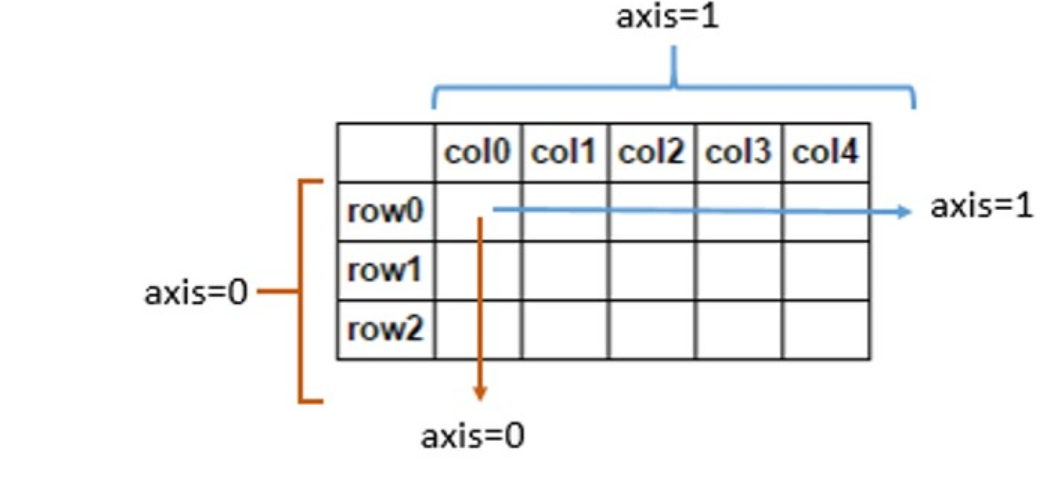

In [1]:
import pandas as pd
import numpy as np
df3 = pd.DataFrame(np.random.randint(1, 10, (5,5)), columns=['a', 'b', 'c', 'd', 'e'], index=['A', 'B', 'C', 'D', 'E'])
df3.iloc()[1, 1:4] = np.NaN
print(df3)
print("-----------------") 
mapping_dict = {'a':'Python', 'b':'Python', 'c':'Java', 'd':'C', 'e':'Java'}
#df3.columns = df3.columns.map(lambda x:mapping_dict[x])
#print("-----------------") 
#print(df3)
print("size")
print(df3.groupby(mapping_dict, axis=1).size())
print("count")
print(df3.groupby(mapping_dict, axis=1).count())
print("sum")
print(df3.groupby(mapping_dict, axis=1).sum())

   a    b    c    d  e
A  2  7.0  8.0  5.0  6
B  8  NaN  NaN  NaN  4
C  5  3.0  3.0  2.0  8
D  2  5.0  2.0  1.0  7
E  8  6.0  2.0  6.0  1
-----------------
size
C         1
Java      2
Python    2
dtype: int64
count
   C  Java  Python
A  1     2       2
B  0     1       1
C  1     2       2
D  1     2       2
E  1     2       2
sum
     C  Java  Python
A  5.0  14.0     9.0
B  0.0   4.0     8.0
C  2.0  11.0     8.0
D  1.0   9.0     7.0
E  6.0   3.0    14.0


### axis=0 求均值

In [2]:
import pandas as pd
import numpy as np
empl_df = pd.DataFrame({
    'Name': ["Jon", "Jon", "Mike", "Luna", "Sam", "Aliza"],
    'Age': [30, 33, 35, 30, 30, 31],
    'Weight(KG)': [75, 75, 80, 70, 73, 70],
    'Height(meters)': [1.7, 1.7, 1.85, 1.75, np.nan, 1.75],
    'Salary($)': [3300, 3500, 4000, 3050, np.nan, 3700]
})
print("The Employee DataFrame is:")
print(empl_df,"\n")

print("The DataFrame with mean values of each column is:")
print(empl_df.groupby('Name',axis=0).sum())
print("========================")
print(empl_df.groupby('Name',axis=0).count())
print("========================")
print(empl_df.groupby('Name',axis=0).size())

The Employee DataFrame is:
    Name  Age  Weight(KG)  Height(meters)  Salary($)
0    Jon   30          75            1.70     3300.0
1    Jon   33          75            1.70     3500.0
2   Mike   35          80            1.85     4000.0
3   Luna   30          70            1.75     3050.0
4    Sam   30          73             NaN        NaN
5  Aliza   31          70            1.75     3700.0 

The DataFrame with mean values of each column is:
       Age  Weight(KG)  Height(meters)  Salary($)
Name                                             
Aliza   31          70            1.75     3700.0
Jon     63         150            3.40     6800.0
Luna    30          70            1.75     3050.0
Mike    35          80            1.85     4000.0
Sam     30          73            0.00        0.0
       Age  Weight(KG)  Height(meters)  Salary($)
Name                                             
Aliza    1           1               1          1
Jon      2           2               2          2


## 功能聚合與重新採樣
+ 我們可針對數值資料進行各種計算。
+ 聚合代表 .agg( ) 這個動作：
   + 可以整併各種計算為多個 column 輸出。
   + 分組後也可以利用可以進行各組的資料計算。
+ 我們可針對物件進行 resample( ) 動作進行重新採樣，藉此調整日期時間資料的出現頻率。
+ [time offset](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

### pandas028原型

In [3]:
import pandas as pd
df = pd.read_csv('salesv3.csv',encoding="utf-8")
df["date"] = pd.to_datetime(df['date'])
print(df.head( ))
print("-------------")

   account number                         name       sku  quantity  \
0          740150                   Barton LLC  B1-20000        39   
1          714466              Trantow-Barrows  S2-77896        -1   
2          218895                    Kulas Inc  B1-69924        23   
3          307599  Kassulke, Ondricka and Metz  S1-65481        41   
4          412290                Jerde-Hilpert  S2-34077         6   

   unit price  ext price                date  
0       86.69    3380.91 2014-01-01 07:21:51  
1       63.16     -63.16 2014-01-01 10:00:47  
2       90.70    2086.10 2014-01-01 13:24:58  
3       21.05     863.05 2014-01-01 15:05:22  
4       83.21     499.26 2014-01-01 23:26:55  
-------------


In [4]:
import pandas028
c=pandas028.df.set_index('date').groupby('name',sort=True)["ext price"].resample("A-DEC").sum()#表示12月作為結束的一整年
print(c.sort_values(ascending=False))

name                             date      
Kulas Inc                        2014-12-31    137351.96
White-Trantow                    2014-12-31    135841.99
Trantow-Barrows                  2014-12-31    123381.38
Jerde-Hilpert                    2014-12-31    112591.43
Fritsch, Russel and Anderson     2014-12-31    112214.71
Barton LLC                       2014-12-31    109438.50
Will LLC                         2014-12-31    104437.60
Koepp Ltd                        2014-12-31    103660.54
Frami, Hills and Schmidt         2014-12-31    103569.59
Keeling LLC                      2014-12-31    100934.30
Kiehn-Spinka                     2014-12-31     99608.77
Sanford and Sons                 2014-12-31     98822.98
Stokes LLC                       2014-12-31     91535.92
Kuhn-Gusikowski                  2014-12-31     91094.28
Cronin, Oberbrunner and Spencer  2014-12-31     89734.55
Pollich LLC                      2014-12-31     87347.18
Kassulke, Ondricka and Metz      2014-12-31 

In [5]:
b=pandas028.df.groupby(['name', pandas028.pd.Grouper(key='date', freq='A-DEC')])['ext price'].sum( )#A-DEC 採樣頻率為12月底
print(b)

name                             date      
Barton LLC                       2014-12-31    109438.50
Cronin, Oberbrunner and Spencer  2014-12-31     89734.55
Frami, Hills and Schmidt         2014-12-31    103569.59
Fritsch, Russel and Anderson     2014-12-31    112214.71
Halvorson, Crona and Champlin    2014-12-31     70004.36
Herman LLC                       2014-12-31     82865.00
Jerde-Hilpert                    2014-12-31    112591.43
Kassulke, Ondricka and Metz      2014-12-31     86451.07
Keeling LLC                      2014-12-31    100934.30
Kiehn-Spinka                     2014-12-31     99608.77
Koepp Ltd                        2014-12-31    103660.54
Kuhn-Gusikowski                  2014-12-31     91094.28
Kulas Inc                        2014-12-31    137351.96
Pollich LLC                      2014-12-31     87347.18
Purdy-Kunde                      2014-12-31     77898.21
Sanford and Sons                 2014-12-31     98822.98
Stokes LLC                       2014-12-31 

### 功能聚合

In [6]:
import pandas028
a=pandas028.df[["ext price", "quantity"]].sum( )
b=pandas028.df["unit price"].mean( )
print(a)
print("-----------")
print(b)
print("-----------")
c=pandas028.df[["ext price", "quantity", "unit price"]].agg(['sum', 'mean']) # 希望同時計算 sum 與 mean
print(c)
print("-----------")

ext price    2018784.32
quantity       36463.00
dtype: float64
-----------
55.00752666666659
-----------
         ext price      quantity    unit price
sum   2.018784e+06  36463.000000  82511.290000
mean  1.345856e+03     24.308667     55.007527
-----------


### value_counts 統計出現次數

In [7]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'X': [1, 2, 3, np.nan, 3],
                   'Y': [4, np.nan, 8, np.nan, 3]})
print("DataFrame:")
print(df)
absolute_counts=df["X"].value_counts()
absolute_counts_nan=df["X"].value_counts(dropna=False)#表示顯示nan的出現次數 預設為True不顯示nan
print("Frequencies of elements of X column:")
print(absolute_counts)
print(absolute_counts_nan)
print(absolute_counts.index[0]) # 取得出現頻率最高的

DataFrame:
     X    Y
0  1.0  4.0
1  2.0  NaN
2  3.0  8.0
3  NaN  NaN
4  3.0  3.0
Frequencies of elements of X column:
3.0    2
1.0    1
2.0    1
Name: X, dtype: int64
3.0    2
1.0    1
2.0    1
NaN    1
Name: X, dtype: int64
3.0


In [8]:
import pandas028
## sku 產品統一編號
## 分別設定不同欄位做甚麼
a=pandas028.df.agg({'ext price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit price': ['mean']})
get_max = lambda x: x.value_counts(dropna=False).index[0]
b=pandas028.df.agg({'ext price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit price': ['mean'], 'sku': [get_max]})
print(a)
print("-----------")
print(b)
print("-----------")
get_max.__name__ = "most frequent" #設定名稱為most frequent
c=pandas028.df.agg({'ext price': ['sum', 'mean',get_max], 'quantity': ['sum', 'mean'], 'unit price': ['mean'], 'sku': [get_max]})
print(c)
print("-----------")

         ext price      quantity  unit price
sum   2.018784e+06  36463.000000         NaN
mean  1.345856e+03     24.308667   55.007527
-----------
             ext price      quantity  unit price       sku
sum       2.018784e+06  36463.000000         NaN       NaN
mean      1.345856e+03     24.308667   55.007527       NaN
<lambda>           NaN           NaN         NaN  S2-77896
-----------
                  ext price      quantity  unit price       sku
sum            2.018784e+06  36463.000000         NaN       NaN
mean           1.345856e+03     24.308667   55.007527       NaN
most frequent  1.484000e+03           NaN         NaN  S2-77896
-----------


In [9]:
import pandas027
import numpy as np
print(pandas027.df)
grouped = pandas027.df.groupby('Team')
print(type(grouped))
print("===========================")
print(grouped.first())
print("===========================")
print(grouped.agg("size"))#注意有小寫kings
print(grouped.agg(np.size))#每個欄位都填上相對應的size
print(grouped.agg(lambda x:np.size(x)))

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
        Rank  Year  Points
Team                      
Devils     2  2014     863
Kings      3  2014     741
Riders     1  2014     876
Royals     4  2014     701
kings      4  2015     812
Team
Devils    2
Kings     3
Riders    4
Royals    2
kings     1
dtype: int64
        Rank  Year  Points
Team                      
Devils     2     2       2
Kings      3     3       3
Riders     4     4       4
Royals     2     2       2
kings      1     1       1
        Rank  Year  Points
Team                      
Devils     2     2       2
Kings

# 刪除與修改取代資料

In [10]:
import pandas as pd
filterList = ['年度','經常性薪資-女/男','專業人員-女/男','技術員及助理專業人員-女/男','事務支援人員-女/男',
 '服務及銷售工作人員-女/男','技藝_機械設備操作及組裝人員-女/男','基層技術工及勞力工-女/男']
data = pd.read_csv('HW18__Data.csv')
data.drop(columns=filterList,inplace=True)#inplace=True 可修改原始資 移除filterList的欄位
data.replace(to_replace=r"…|—",value="0",regex=True,inplace=True)#...或- 換成0
data.rename(columns={'經常性薪資-薪資': '經常性',
'專業人員-薪資': '專業人員',
'技術員及助理專業人員-薪資': '技術員及助理',
'事務支援人員-薪資': '事務人員',
'服務及銷售工作人員-薪資': '服務銷售',
'技藝_機械設備操作及組裝人員-薪資': '機械設備操作',
'基層技術工及勞力工-薪資': '基層勞力'},inplace=True)
print(data.head())

         行業別    經常性   專業人員 技術員及助理   事務人員   服務銷售 機械設備操作   基層勞力
0   工業及服務業部門  27055  34003  28646  26068  25012  25338  22824
1       工業部門  26860  33788  28103  25906  25811  24919  22784
2   礦業及土石採取業  26170  35768  27744  23441  23625  26988  22440
3   石油及天然氣礦業  27696  37125  25313  23625  23625  23625      0
4  砂、石及黏土採取業  25661  30000  29185  23405      0  27629  22440


# 資料合併 

## 資料合併 
+ merge( ) 方法可作為 DataFrame 對象之間的連結方式。
 + 裡面必須加入的參數為兩個 DataFrame 對象。
 + on 這個參數指的是用於連接的 Column 索引名稱。
   + 必須存在左右兩個 DataFrame 對象中，如果沒有指定且其他參數也未指定則以兩個 DataFrame 的列名交集做為連接鍵。
   + 如果指定的 Column 於兩個 DataFrame 上的名稱不同，則可以透過 left_on 與 right_on 兩個參數分別指定。
 + how( ) 這個參數是指左右兩個對象中存在不重合的鍵合併連接的方式：
   + inner：預設，代表交集 (內連接)。
   + outer：代表並集 (外連接)。
   + left：代表左外連接。
   + right：代表右外連接。
   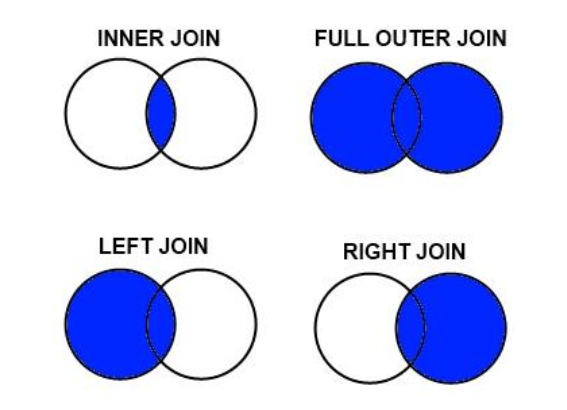

### 資料合併的原始資料

In [12]:
import pandas as pd
left = pd.DataFrame({ 'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame({'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5']})
print(left)
print("--------------------")
print(right)
print("--------------------")

   id    Name subject_id
0   1    Alex       sub1
1   2     Amy       sub2
2   3   Allen       sub4
3   4   Alice       sub6
4   5  Ayoung       sub5
--------------------
   id   Name subject_id
0   1  Billy       sub2
1   2  Brian       sub4
2   3   Bran       sub3
3   4  Bryce       sub6
4   5  Betty       sub5
--------------------


In [14]:
import pandas030
pd1=pandas030.pd
left1=pandas030.left
right1=pandas030.right
print("--------id------------")
print(pd1.merge(left1,right1,on='id')) #使用id做合併
print("----------'id','subject_id----------")
print(pd1.merge(left1,right1,on=['id','subject_id'])) #id一樣的 且 subject_id也一樣的做合併
print("---------left-----------")
print(pd1.merge(left1,right1, on='subject_id', how='left')) #以left資料為主 sub1在right 資料缺少所以Nan
print("-----------right---------")
print(pd1.merge(left1,right1, on='subject_id', how='right')) #以Right資料為主 sub3在left 資料缺少所以Nan
print("---------outer-----------")
print(pd1.merge(left1,right1, how='outer', on='subject_id')) # Right or left有的都可以
print("---------inner-----------")
print(pd1.merge(left1,right1, on='subject_id', how='inner'))# Right and left 的subject_id 必須一樣
print("--------------------")
print(pd1.merge(left1,right1,on=['subject_id'])) 

--------id------------
   id  Name_x subject_id_x Name_y subject_id_y
0   1    Alex         sub1  Billy         sub2
1   2     Amy         sub2  Brian         sub4
2   3   Allen         sub4   Bran         sub3
3   4   Alice         sub6  Bryce         sub6
4   5  Ayoung         sub5  Betty         sub5
----------'id','subject_id----------
   id  Name_x subject_id Name_y
0   4   Alice       sub6  Bryce
1   5  Ayoung       sub5  Betty
---------left-----------
   id_x  Name_x subject_id  id_y Name_y
0     1    Alex       sub1   NaN    NaN
1     2     Amy       sub2   1.0  Billy
2     3   Allen       sub4   2.0  Brian
3     4   Alice       sub6   4.0  Bryce
4     5  Ayoung       sub5   5.0  Betty
-----------right---------
   id_x  Name_x subject_id  id_y Name_y
0   2.0     Amy       sub2     1  Billy
1   3.0   Allen       sub4     2  Brian
2   NaN     NaN       sub3     3   Bran
3   4.0   Alice       sub6     4  Bryce
4   5.0  Ayoung       sub5     5  Betty
---------outer-----------
   id

In [15]:
import pandas as pd
left = pd.DataFrame({
         'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject1':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame(
         {'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject2':['sub2','sub4','sub3','sub6','sub5']})
print(left)
print("--------------------")
print(right)
print("--------------------")
print(pd.merge(left,right,left_on="subject1",right_on="subject2" , how='left')) #因為名稱不一樣 需特別指定left_on 與 right_on
# 因為指定left所以left全都顯示 right只顯示與left共有的一部分 如無資料顯示NaN
print("--------------------")

   id    Name subject1
0   1    Alex     sub1
1   2     Amy     sub2
2   3   Allen     sub4
3   4   Alice     sub6
4   5  Ayoung     sub5
--------------------
   id   Name subject2
0   1  Billy     sub2
1   2  Brian     sub4
2   3   Bran     sub3
3   4  Bryce     sub6
4   5  Betty     sub5
--------------------
   id_x  Name_x subject1  id_y Name_y subject2
0     1    Alex     sub1   NaN    NaN      NaN
1     2     Amy     sub2   1.0  Billy     sub2
2     3   Allen     sub4   2.0  Brian     sub4
3     4   Alice     sub6   4.0  Bryce     sub6
4     5  Ayoung     sub5   5.0  Betty     sub5
--------------------


# 資料連結

## 資料連結的原始資料

In [16]:
import pandas as pd
one = pd.DataFrame({ 'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5'],
         'Marks_scored':[98,90,87,69,78]},
         index=[1,2,3,4,5])
two = pd.DataFrame({  'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5'],
         'Marks_scored':[89,80,79,97,88]},
         index=[1,2,3,4,5])
print(one)
print("--------------------")
print(two)
print("--------------------")

     Name subject_id  Marks_scored
1    Alex       sub1            98
2     Amy       sub2            90
3   Allen       sub4            87
4   Alice       sub6            69
5  Ayoung       sub5            78
--------------------
    Name subject_id  Marks_scored
1  Billy       sub2            89
2  Brian       sub4            80
3   Bran       sub3            79
4  Bryce       sub6            97
5  Betty       sub5            88
--------------------


In [21]:
import pandas031
pd1=pandas031.pd
one1=pandas031.one
two1=pandas031.two
pd2=pd1.concat([one1,two1])## axis=0
print(pd2)
print("--------------------")
pd3=pd1.concat([one1,two1],keys=['one-x','two-y'])##建立階層式索引 最外層的Key
print(pd3)
print("--------------------")
pd4=pd1.concat([one1,two1],ignore_index=True) #不使用之前的index
print(pd4)
print("--------------------")
pd5=pd1.concat([one1,two1],axis=1)
print(pd5)
print("--------------------")

     Name subject_id  Marks_scored
1    Alex       sub1            98
2     Amy       sub2            90
3   Allen       sub4            87
4   Alice       sub6            69
5  Ayoung       sub5            78
1   Billy       sub2            89
2   Brian       sub4            80
3    Bran       sub3            79
4   Bryce       sub6            97
5   Betty       sub5            88
--------------------
           Name subject_id  Marks_scored
one-x 1    Alex       sub1            98
      2     Amy       sub2            90
      3   Allen       sub4            87
      4   Alice       sub6            69
      5  Ayoung       sub5            78
two-y 1   Billy       sub2            89
      2   Brian       sub4            80
      3    Bran       sub3            79
      4   Bryce       sub6            97
      5   Betty       sub5            88
--------------------
     Name subject_id  Marks_scored
0    Alex       sub1            98
1     Amy       sub2            90
2   Allen       s

# 轉換與過濾
+ 轉換：
  + Group 或 column 可以透過 transform 函數進行轉換，返回索引的對象的大小與被分組的大小相同。
+ 過濾：
  + 依據 filter( ) 函數進行篩選與過濾的動作並傳回資料。

In [22]:
import pandas as pd
pl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'Kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders','LuLu'],
         'Rank': [1, 2, 2, 3, 3,4 ,1,1,2,4,1,2,4],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017,2018],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690,700]}
df = pd.DataFrame(pl_data)
print(df)

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    Kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
12    LuLu     4  2018     700


## 選組與聚合

In [23]:
import pandas_group as df1
import numpy as np
grouped = df1.df.groupby('Year')
print (grouped.get_group(2017))
print ("=================================")
grouped = df1.df.groupby('Year')
print(grouped['Points'].agg(np.mean))
print(grouped['Points'].agg("mean"))
print ("=================================")
grouped2 = df1.df.groupby('Team')
print(grouped2.agg(np.size))
print ("=================================")
print(grouped2['Points'].agg([np.sum, np.mean, np.std]))

      Team  Rank  Year  Points
7    Kings     1  2017     788
11  Riders     2  2017     690
Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
Name: Points, dtype: float64
Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
Name: Points, dtype: float64
        Rank  Year  Points
Team                      
Devils     2     2       2
Kings      4     4       4
Riders     4     4       4
Royals     2     2       2
         sum    mean         std
Team                            
Devils  1536  768.00  134.350288
Kings   3097  774.25   31.899582
Riders  3049  762.25   88.567771
Royals  1505  752.50   72.831998


## 轉換與過濾

In [26]:
import pandas_group as df1
import numpy as np
grouped = df1.df.groupby('Team')
print (df1.df)
print ("==================")
print (grouped.first())#取得每個群組的第一個值
print ("==================")
score = lambda x: x*10
print (grouped.transform(score))
print ("==================")
print (df1.df.groupby('Team').filter(lambda x: len(x) >= 3))# 群組數量為>=3的列出

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    Kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
        Rank  Year  Points
Team                      
Devils     2  2014     863
Kings      3  2014     741
Riders     1  2014     876
Royals     4  2014     701
    Rank   Year  Points
0     10  20140    8760
1     20  20150    7890
2     20  20140    8630
3     30  20150    6730
4     30  20140    7410
5     40  20150    8120
6     10  20160    7560
7     10  20170    7880
8     20  20160    6940
9     40  20140    7010
10    10  20150    8040
11    20  20170    6900
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
4    Kings     3  2014     741

# 進階圖表功能
+ pandas 內附簡易的 matplot 繪圖工具，可以讓您方便快速產生結果，但如果您的環境內已經執行 matplot，那 pandas 的圖表也必須透過 matplot 的物件執行 show 方式才能呈現。
+ 折線圖是最基本產生圖表的方式。

                   A         B         C         D
2018-01-01 -0.524819  0.159476 -2.255308 -0.191424
2018-01-02  1.309710 -0.303585  0.722202  0.142440
2018-01-03  1.355263  1.221908 -0.655255  0.513455
2018-01-04  0.192066 -0.076529 -0.447860 -0.813049
2018-01-05  0.841183  0.237174  1.376156  1.744289
2018-01-06 -1.032148  0.249606 -0.164772  0.000590
2018-01-07  1.351529 -0.992735 -0.017201  1.430299
2018-01-08 -0.281240  0.428489  0.360596 -1.087628
2018-01-09  0.041171 -1.128148  0.161193 -0.725859
2018-01-10 -0.754874 -0.095902  1.086742  2.143960


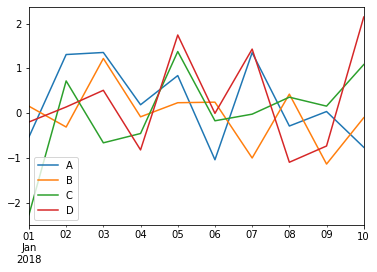

In [27]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## np.random.randn(10,4) 10x4 ndarray 內容為亂數
df = pd.DataFrame(np.random.randn(10,4),index=pd.date_range('1/1/2018',periods=10), columns=list('ABCD'))
print(df)
df.plot( )
plt.show( )

## 進階圖表-兩條曲線

           population       area
London        8615246  1572000.0
Berlin        3562166   891850.0
Madrid        3165235   605770.0
Rome          2874038  1285000.0
Paris         2273305   105400.0
Vienna        1805681   414600.0
Bucharest     1803425   228000.0
Hamburg       1760433   755000.0
Budapest      1754000   525200.0
Warsaw        1740119   517000.0
Barcelona     1602386   101900.0
Munich        1493900   310400.0
Milan         1350680   181800.0


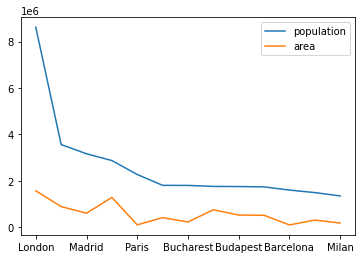

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
cities = {"name": ["London", "Berlin", "Madrid", "Rome",
                   "Paris", "Vienna", "Bucharest", "Hamburg",
                   "Budapest", "Warsaw", "Barcelona","Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,1350680],
          "area" : [1572, 891.85, 605.77, 1285,
                    105.4, 414.6, 228, 755, 525.2, 517, 101.9, 310.4,181.8]
}
city_frame = pd.DataFrame(cities, columns=["population", "area"],index=cities["name"])
city_frame["area"] *= 1000
print(city_frame)
city_frame.plot( )
plt.show()

# 子圖表 (1)
+ 一個 Figure 對象可以包含多個子圖 (Axes)，預設三個參數：
  + num_rows：幾個 rows。
  + num_cols：幾個 columns。
  + plot_num：代表第幾張圖表。
+ 然後按照從左到右，從上到下的順序對每個子區域進行編號，左上的子區域的編號為 1。
+ Plot_num 參數指定創建的 Axes 對象所在的區域。
+ 如果 numRows ＝ 2、numCols ＝ 3，那整個繪製圖表樣式為 2×3 的圖片區域,用坐標表示為
  + (1, 1), (1, 2), (1, 3)
  + (2, 1), (2, 2), (2, 3)
+ 當 plotNum ＝ 3 時,表示的坐標為 (1, 3)，即第一 row 第三 column 的子圖。
+ 如果 numRows、numCols 和 plotNum 這三個數都小於 10 的話，可以把它們縮寫為一個整數，例如 subplot(232) 和 subplot(2,3,2) 是相同的。
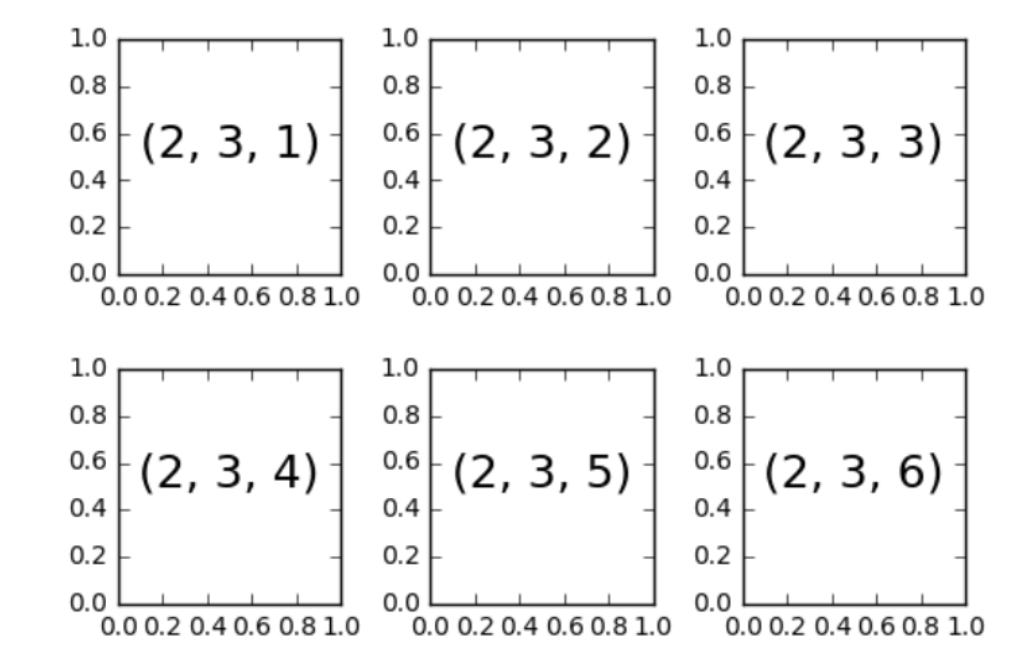

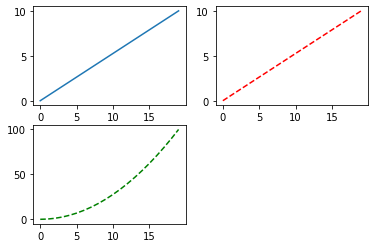

In [29]:
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(0.0, 20.0, 1)
s = np.linspace(0, 10, 20)
# 左往右數第幾張
plt.subplot(2, 2, 1) #產生2 x 2的圖表 第1張
plt.plot(t, s)
plt.subplot(2, 2, 2)#產生2 x 2的圖表 第2張
plt.plot(t, s, 'r--')
plt.subplot(223)#產生2 x 1的圖表 第3張
plt.plot(t, s**2, 'g--')
plt.show()

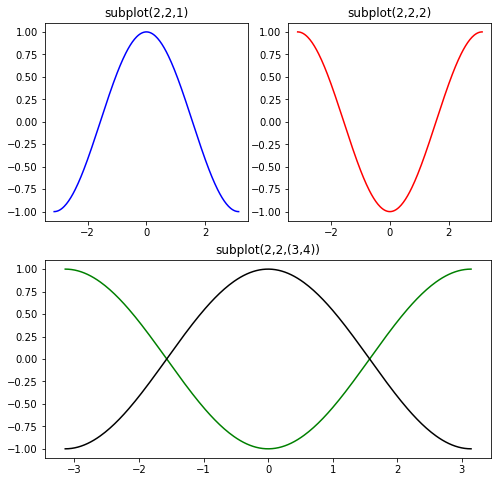

In [30]:
import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(-np.pi, np.pi, 256)# 負pi 到正pi 間格取256
Y = np.cos(X)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(X, Y, color="blue")
plt.title('subplot(2,2,1)')
plt.subplot(2,2,2)
plt.plot(X, Y*-1, color="red")
plt.title('subplot(2,2,2)')
plt.subplot(2,2,(3,4))
plt.plot(X, Y*-1, color="green")
plt.plot(X, Y, color="black")
plt.title('subplot(2,2,(3,4))')
plt.show( )

# 分析與圖表顯示 1- 查看數值與型態
+ 讀取 salesv2.csv，並請將日期資料視為字串，方便之後的重新取樣。
+ 我們可以做一些快速分析，可再查看單價 (unit price)，可知道平均值與最大最小值。
+ 接著透過 dtypes 的輸出確保數字資料的格式是浮點數或整數。
+ describe 可快速查看count mean std min 等綜合資訊

In [31]:
import pandas as pd
sales=pd.read_csv("salesv2.csv",parse_dates=['date'])# 將date轉換成日期格式
print(sales.head( ))
print("----------1-----------")
print(sales.describe( ))
print("----------2-----------")
print(sales['unit price'].describe( ))
print("----------3-----------")
print(sales.dtypes)
print("----------4-----------")

   account number                           name       sku category  quantity  \
0          296809                    Carroll PLC  QN-82852     Belt        13   
1           98022              Heidenreich-Bosco  MJ-21460    Shoes        19   
2          563905  Kerluke, Reilly and Bechtelar  AS-93055    Shirt        12   
3           93356                  Waters-Walker  AS-93055    Shirt         5   
4          659366                  Waelchi-Fahey  AS-93055    Shirt        18   

   unit price  ext price                date  
0       44.48     578.24 2014-09-27 07:13:03  
1       53.62    1018.78 2014-07-29 02:10:44  
2       24.16     289.92 2014-03-01 10:51:24  
3       82.68     413.40 2013-11-17 20:41:11  
4       99.64    1793.52 2014-01-03 08:14:27  
----------1-----------
       account number     quantity   unit price   ext price
count     1000.000000  1000.000000  1000.000000  1000.00000
mean    535208.897000    10.328000    56.179630   579.84390
std     277589.746014     5.

## 分析與圖表顯示 2- 分組與 Bar 顯示
+ 首先我們只取出 name、 ext price 與 date 三個欄位分析。
+ 為了理解購買模式，我們依據名稱 (name) 對所有客戶進行分組，再接著查看每個客戶的消費次數情況。
+　資料再以 Bar 方式顯示!

   account number                           name       sku category  quantity  \
0          296809                    Carroll PLC  QN-82852     Belt        13   
1           98022              Heidenreich-Bosco  MJ-21460    Shoes        19   
2          563905  Kerluke, Reilly and Bechtelar  AS-93055    Shirt        12   
3           93356                  Waters-Walker  AS-93055    Shirt         5   
4          659366                  Waelchi-Fahey  AS-93055    Shirt        18   

   unit price  ext price                date  
0       44.48     578.24 2014-09-27 07:13:03  
1       53.62    1018.78 2014-07-29 02:10:44  
2       24.16     289.92 2014-03-01 10:51:24  
3       82.68     413.40 2013-11-17 20:41:11  
4       99.64    1793.52 2014-01-03 08:14:27  
----------1-----------
----------2-----------
----------3-----------
----------4-----------
                            name  ext price                date
0                    Carroll PLC     578.24 2014-09-27 07:13:03
1          

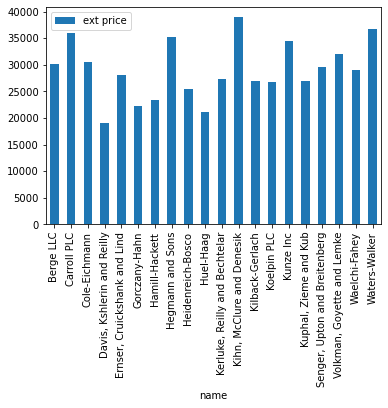

In [32]:
import matplotlib.pyplot as plt
import pandasplot009a
customers = pandasplot009a.sales[['name','ext price','date']]
print(customers.head( ))
print("----------5-----------")
customer_group = customers.groupby('name')
print(customer_group.size( ))
print("----------6-----------")
sales_totals = customer_group.sum( )
print(sales_totals)
my_plot = sales_totals.plot(kind='bar')
plt.show( )

## 分析與圖表顯示 3- Bar 修改
+ 這張圖表再做一些調整，我們可以使它更有影響力：
  + 資料進行排序
  + 刪除圖例
  + 添加標題
  + 標記軸
+ 圖表將可顯示最大客戶與最小客戶之間差異。

                            name  ext price                date
0                    Carroll PLC     578.24 2014-09-27 07:13:03
1              Heidenreich-Bosco    1018.78 2014-07-29 02:10:44
2  Kerluke, Reilly and Bechtelar     289.92 2014-03-01 10:51:24
3                  Waters-Walker     413.40 2013-11-17 20:41:11
4                  Waelchi-Fahey    1793.52 2014-01-03 08:14:27
----------5-----------
name
Berge LLC                        52
Carroll PLC                      57
Cole-Eichmann                    51
Davis, Kshlerin and Reilly       41
Ernser, Cruickshank and Lind     47
Gorczany-Hahn                    42
Hamill-Hackett                   44
Hegmann and Sons                 58
Heidenreich-Bosco                40
Huel-Haag                        43
Kerluke, Reilly and Bechtelar    52
Kihn, McClure and Denesik        58
Kilback-Gerlach                  45
Koelpin PLC                      53
Kunze Inc                        54
Kuphal, Zieme and Kub            52
Senger, Upto

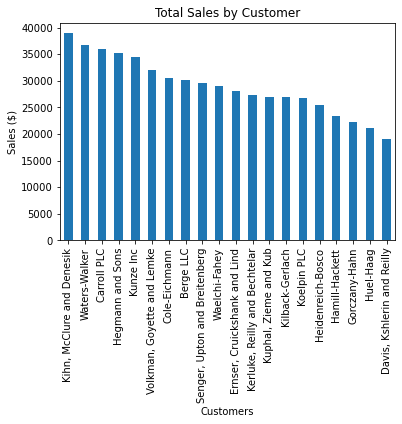

In [33]:
import matplotlib.pyplot as plt
import pandasplot009a
customers = pandasplot009a.sales[['name','ext price','date']]
print(customers.head( ))
print("----------5-----------")
customer_group = customers.groupby('name')
print(customer_group.size( ))
print("----------6-----------")
sales_totals = customer_group.sum( )
print(sales_totals.sort_values(by='ext price',ascending=False))
#my_plot = sales_totals.plot(kind='bar')
# ext price高的排在前面
my_plot = sales_totals.sort_values(by='ext price',ascending=False).plot(
    kind='bar',legend=None,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")
plt.show( )

## 分析與圖表顯示 4- 堆疊長條圖
+ 再請試著將銷售部分以類別細分。
+ 再將類別分組後的資料以堆疊長條圖方式顯示。

                            name category  ext price                date
0                    Carroll PLC     Belt     578.24 2014-09-27 07:13:03
1              Heidenreich-Bosco    Shoes    1018.78 2014-07-29 02:10:44
2  Kerluke, Reilly and Bechtelar    Shirt     289.92 2014-03-01 10:51:24
3                  Waters-Walker    Shirt     413.40 2013-11-17 20:41:11
4                  Waelchi-Fahey    Shirt    1793.52 2014-01-03 08:14:27
                      ext price
name        category           
Berge LLC   Belt        6033.53
            Shirt       9670.24
            Shoes      14361.10
Carroll PLC Belt        9359.26
            Shirt      13717.61
                             ext price                    
category                          Belt     Shirt     Shoes
name                                                      
Berge LLC                      6033.53   9670.24  14361.10
Carroll PLC                    9359.26  13717.61  12857.44
Cole-Eichmann                  8112.70  145

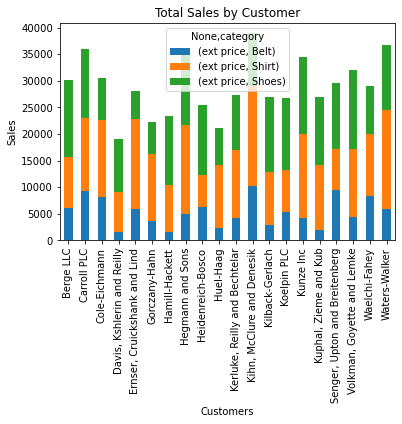

In [34]:
import matplotlib.pyplot as plt
import pandasplot009a
customers = pandasplot009a.sales[['name','category','ext price','date']]
print(customers.head())
print("===================================")
category_group=customers.groupby(['name','category']).sum( )
print(category_group.head())
print("===================================")
print(category_group.unstack().head( ))
print("===================================")
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")
plt.show()

## 分析與圖表顯示 5- 堆疊長條圖調整
+ 圖例於視覺上造成阻礙。
+ 堆疊長條圖顯示方式略作調整。
+ loc編號
|功能         |編號|
|-------------|-----|
|最好(右上)預設| 0  |
|右上方	   | 1   |
|左上	       | 2|
|左下角	      | 3|
|右下	       | 4|
|對	        | 5|
|中左	       | 6|
|中右	       | 7|
|下中心	      | 8|
|上中	       | 9|
|中央	       | 10|

                            name category  ext price                date
0                    Carroll PLC     Belt     578.24 2014-09-27 07:13:03
1              Heidenreich-Bosco    Shoes    1018.78 2014-07-29 02:10:44
2  Kerluke, Reilly and Bechtelar    Shirt     289.92 2014-03-01 10:51:24
3                  Waters-Walker    Shirt     413.40 2013-11-17 20:41:11
4                  Waelchi-Fahey    Shirt    1793.52 2014-01-03 08:14:27
                      ext price
name        category           
Berge LLC   Belt        6033.53
            Shirt       9670.24
            Shoes      14361.10
Carroll PLC Belt        9359.26
            Shirt      13717.61
                             ext price                    
category                          Belt     Shirt     Shoes
name                                                      
Berge LLC                      6033.53   9670.24  14361.10
Carroll PLC                    9359.26  13717.61  12857.44
Cole-Eichmann                  8112.70  145

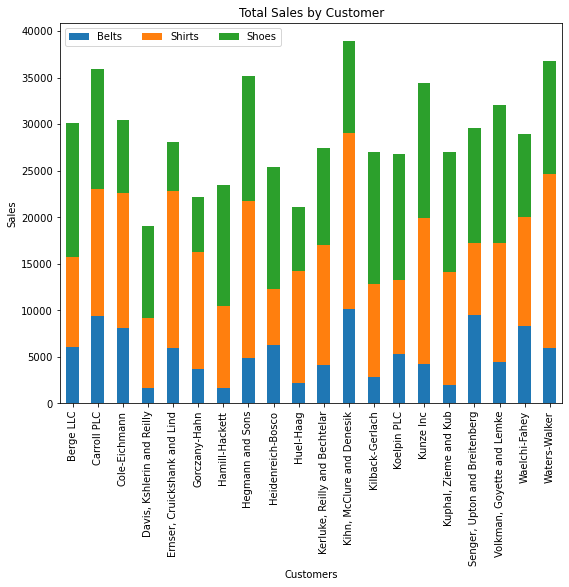

In [43]:
import matplotlib.pyplot as plt
import pandasplot009a
customers = pandasplot009a.sales[['name','category','ext price','date']]
print(customers.head( ))
category_group=customers.groupby(['name','category']).sum( )
print(category_group.head( ))
print(category_group.unstack( ).head( ))
my_plot = category_group.unstack( ).plot(
    kind='bar',stacked=True,title="Total Sales by Customer",
    figsize=(9, 7))#改變圖片大小
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")
my_plot.legend(["Belts","Shirts","Shoes"],
               loc=2,ncol=3)# loc上中 顯示3組 ncol=2 每欄顯示2組
plt.show( )

## 設計直方圖
+ 已經知道最大的客戶以及他們如何購買產品，我們可能希望更詳細地了解購買模式。
+ 讓我們再看一下數據並試著看看個人購買量有多大。
+ 直方圖允許我們將購買分組在一起，以便我們可以看到客戶交易的大小。
+ 我們可以建立一個包含 20 個資料的直方圖來顯示購買模式的分佈。

ext price    13
dtype: int64


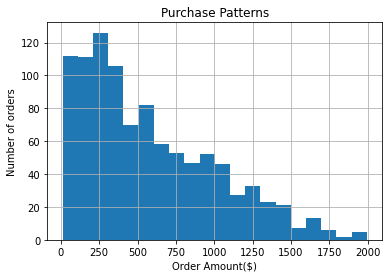

In [44]:
import matplotlib.pyplot as plt
import pandasplot009a
purchase_patterns = pandasplot009a.sales[['ext price']]
# print(purchase_patterns[((purchase_patterns['ext price'] <2000 ) & (purchase_patterns['ext price'] >= 1750))])
print(purchase_patterns.query("`ext price`< 2000 & `ext price`>=1750").count())
purchase_plot = purchase_patterns['ext price'].hist(bins=20)#分成20份
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")#訂單金額
purchase_plot.set_ylabel("Number of orders")#此金額的訂單筆數
plt.show( )

## 日期重新採樣
+ 讓我們從另外一個角度，查看銷售額隨著時間的推移是否會更忙。
+ 我們按日期分析資料，我們需要使用日期列作為索引  。
+ 我們想要按月份查看資料，我們可以重新採樣並總結。
+ 我們可以使用 "M" 作為重新採樣的時間段，代表資料應在月底重新採樣。

   ext price                date
0     578.24 2014-09-27 07:13:03
1    1018.78 2014-07-29 02:10:44
2     289.92 2014-03-01 10:51:24
3     413.40 2013-11-17 20:41:11
4    1793.52 2014-01-03 08:14:27
============================date======================
                     ext price
date                          
2014-09-27 07:13:03     578.24
2014-07-29 02:10:44    1018.78
2014-03-01 10:51:24     289.92
2013-11-17 20:41:11     413.40
2014-01-03 08:14:27    1793.52
==========================M========================
            ext price
date                 
2013-10-31   14085.27
2013-11-30   44932.78
2013-12-31   57752.23
2014-01-31   53161.35
2014-02-28   51783.56


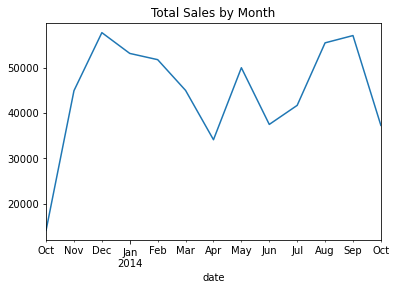

In [45]:
import matplotlib.pyplot as plt
import pandasplot009a
purchase_patterns = pandasplot009a.sales[['ext price','date']]
print(purchase_patterns.head( ))
print("============================date======================")
purchase_patterns = purchase_patterns.set_index('date')
print(purchase_patterns.head( ))
print("==========================M========================")
print(purchase_patterns.resample('M').sum().head( ))
print("==================================================")
purchase_plot = purchase_patterns.resample('M').sum().plot(# 每個月的銷售額
    title="Total Sales by Month",legend=None)
plt.show( )
fig = purchase_plot.get_figure( )
fig.savefig("total-sales.png")

# 作業

           週六       週日
路線方向                  
1北向   4684830  4980642
1南向   5149661  4809308
3北向   2898974  3554098
3南向   3534621  3272488
<class 'matplotlib.axes._subplots.AxesSubplot'>


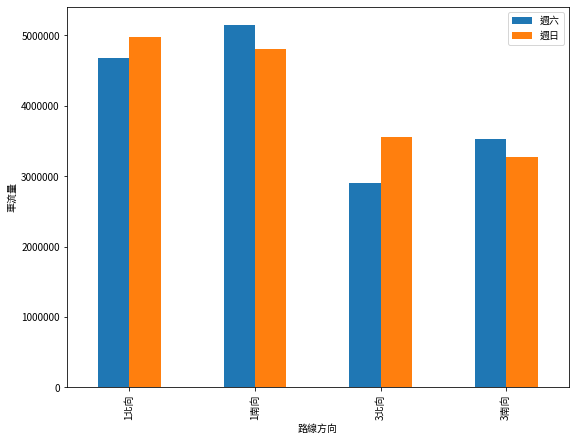

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
# 將字體換成Noto Serif
plt.rcParams['font.sans-serif'] = ['Noto Sans TC']
# 修復負號顯示問題
plt.rcParams['axes.unicode_minus']=False

data = pd.read_csv('HW16__Data.csv')
data['路線方向']=data['路線方向'].map(lambda x:x[1:4])
data = data[data['路線方向'].isin(['1南向','1北向','3北向','3南向'])]
gData = data.groupby('路線方向')
gData = gData[['週六','週日']].sum()
print(gData)
#gData = gData[(gData['週六'] > 2000000) & (gData['週日'] > 2000000)]
gData =gData.query("週六 > 2000000 & 週日 > 2000000")
my_plot = gData.plot(kind='bar',figsize=(9, 7))
print(type(my_plot))
#移除科學記號
my_plot.ticklabel_format(axis='y', style='plain', useOffset=False)
my_plot.set_ylabel("車流量")

plt.show()